# Chapter 9. Plotting and Visualization
<a id='index'></a>
The simplest way to follow the code examples in the chapter is to use interactive plot‐ ting in the Jupyter notebook. 
To set this up, execute the following statement in a Jupyter notebook:

In [70]:
%matplotlib notebook

## Table of Content
- [9.1 A Brief matplotlib API Primer](#91)
    - [9.1.1 Figures and Subplots](#911)
    - [9.1.2 Adjusting the spacing around subplots](#912)
    - [9.1.3 Colors, Markers, and Line Styles](#913)
    - [9.1.4 Ticks, Labels, and Legends](#914)
        - [9.1.4.1 Setting the title, axis labels, ticks, and ticklabels](#9141)
        - [9.1.4.2 Adding legends](#9142)
    - [9.1.5 Annotations and Drawing on a Subplot](#915)
    - [9.1.6 Saving Plots to File](#916)
    - [9.1.7 matplotlib Configuration](#917)
- [9.2 Plotting with pandas and seaborn](#92)
    - [9.2.1 Line Plots](#921)
    - [9.2.2 Bar Plots](#922)
    - [9.2.3 Histograms and Density Plots](#923)
    - [9.2.4 Scatter or Point Plots](#924)
    - [9.2.5 Facet Grids and Categorical Data](#925)

<hr>

## 9.1 A Brief matplotlib API Primer
<a id='91'></a>

<IPython.core.display.Javascript object>


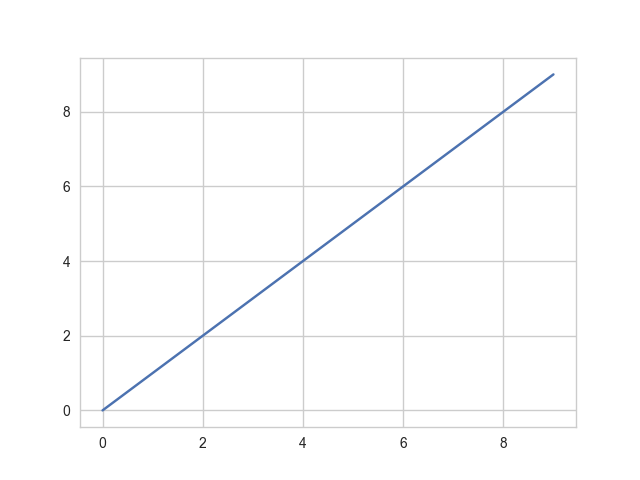

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

data = np.arange(10)

plt.plot(data)

### 9.1.1 Figures and Subplots
<a id='911'></a>
Plots in matplotlib reside within a Figure object. You can create a new figure with ***plt.figure***.
***figsize*** will guarantee the figure has a certain size and aspect ratio if saved to disk.

You also can't make a plot with a blank figure. You have to create one or more **subplots** using ***add_subplot***.

The object returned by fig.add_subplot here are **AxesSubplot** object, on which you can directly plot on the other empty subplot by calling each one's instance method.

***plt.subplots***, that creates a new figure and returns a NumPy array containing the created subplot objects. As the axes array can be easily indexed like a two-dimensional array, axes[a, b] could be used to access certain subplot. (*sharex* and *sharey* could be used for identifying same x- or y- axis)

<IPython.core.display.Javascript object>


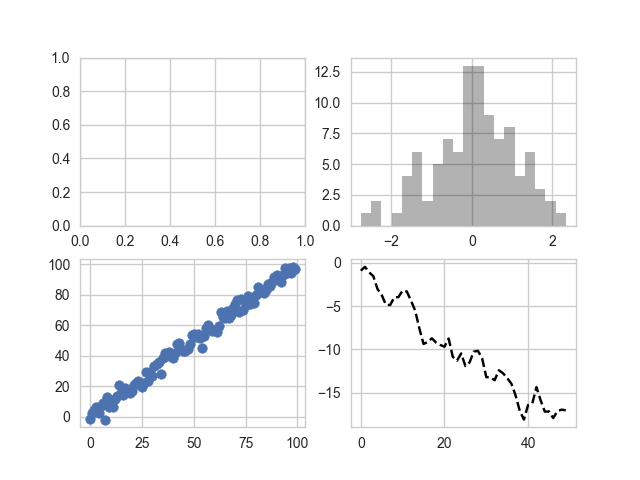

In [72]:
fig = plt.figure()

# 2 * 2, so up to four plots in toal, and we're selecting the first subplot of four
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 'k--' is a style option to tell matplotlib to plot a black dashed line.
plt.plot(np.random.randn(50).cumsum(), 'k--')

# ax2 histogram
_ = ax2.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

# ax3 scattered plot
ax3.scatter(np.arange(100), np.arange(100) + 3 * np.random.randn(100))

<IPython.core.display.Javascript object>


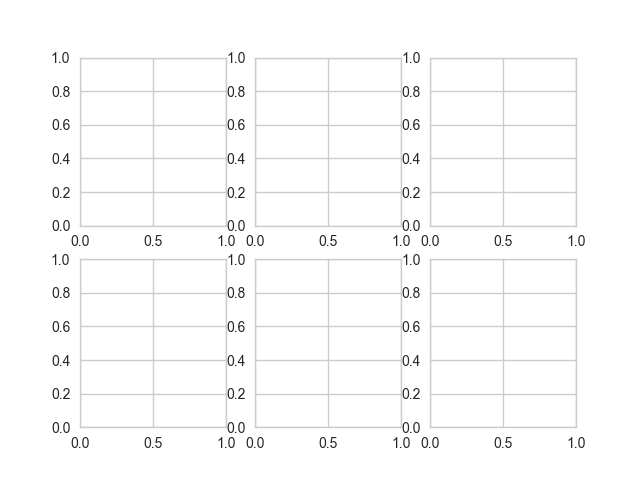

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1178014e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117a23da0>]], dtype=object)

In [73]:
fig, axes = plt.subplots(2, 3)
axes

### 9.1.2 Adjusting the spacing around subplots
<a id='912'></a>
You can change the spacing using the ***subplots_adjust*** method on **Figure** objects, also available as a top-level function.

***wspace*** and ***hspace*** controls the percent of the figure width and figure height, respectively, to use as spacing between subplots.

<IPython.core.display.Javascript object>


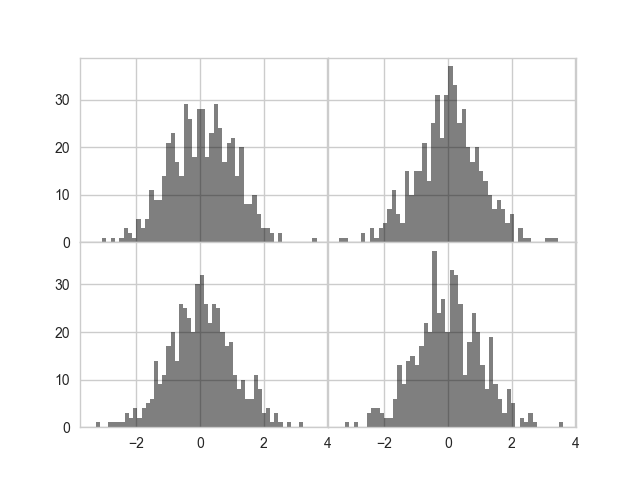

In [74]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        
plt.subplots_adjust(wspace=0, hspace=0)

### 9.1.3 Colors, Markers, and Line Styles
<a id='913'></a>

    ax.plot(x, y, 'g--') - Green dashes
    ax.plot(x, y, linestyle='--', color='g') - Green dashes
    ...

<IPython.core.display.Javascript object>


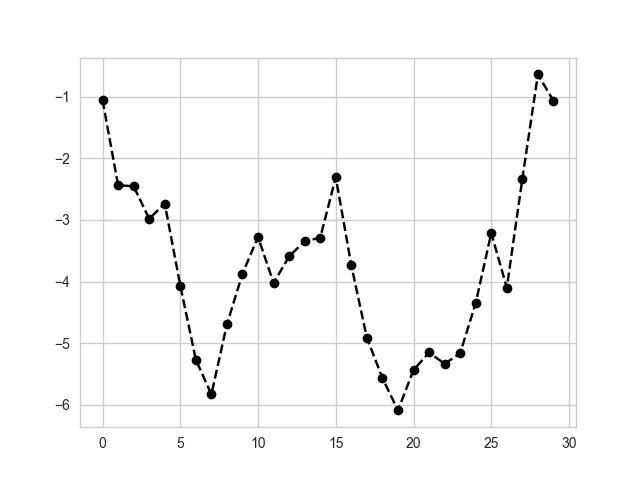

In [75]:
fig, axes = plt.subplots(1, 1)

plt.plot(np.random.randn(30).cumsum(), 'ko--')
# equal to plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


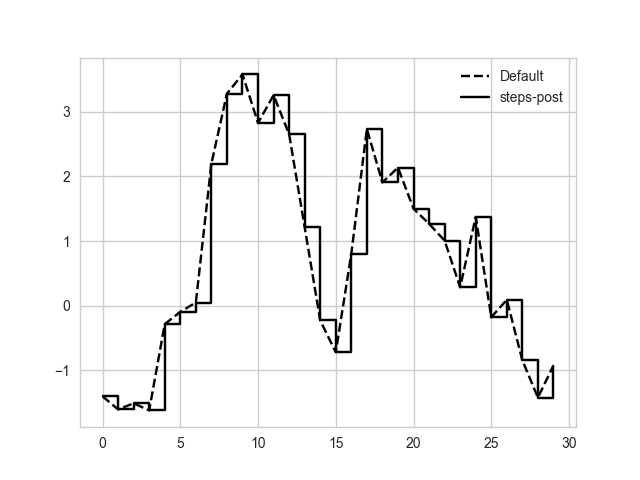

In [76]:
fig, axes = plt.subplots(1, 1)

data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

plt.legend(loc='best')

### 9.1.4 Ticks, Labels, Legends
<a id='914'></a>
The pyplot interface, designed for interactive use, consists of methods like *xlim* (plot range), *xticks* (tick locations), and *xticklabels* (tick labels).

#### 9.1.4.1 Setting the title, axis labels, ticks, and ticklabels
<a id='9141'></a>
To change the x-axis ticks, it’s easiest to use ***set_xticks*** and ***set_xticklabels***.

<IPython.core.display.Javascript object>


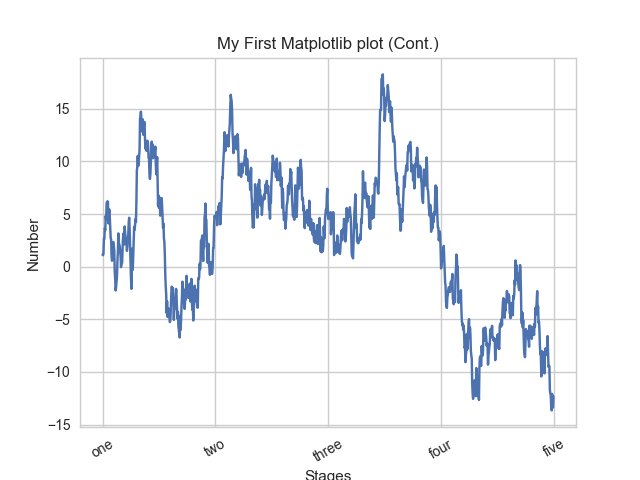

[Text(0,0.5,'Number'),
 Text(0.5,0,'Stages'),
 Text(0.5,1,'My First Matplotlib plot (Cont.)')]

In [77]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], 
                            rotation=30,
                            fontsize='small')

ax.set_title('My First Matplotlib plot')
ax.set_xlabel('Stages')

# The axes class has a set method that allows batch setting of plot properties.
props = {
    'title': 'My First Matplotlib plot (Cont.)',
    'xlabel': 'Stages',
    'ylabel': 'Number'
}

ax.set(**props)

#### 9.1.4.2 Adding legends
<a id='9142'></a>
Once you’ve done this, you can either call ***ax.legend()*** or ***plt.legend()*** to automatically create a legend.

The loc tells matplotlib where to place the plot. If you aren’t picky, **'best'** is a good option, as it will choose a location that is most out of the way. To exclude one or more elements from the legend, pass no label or ***label='_nolegend_'***.

<IPython.core.display.Javascript object>


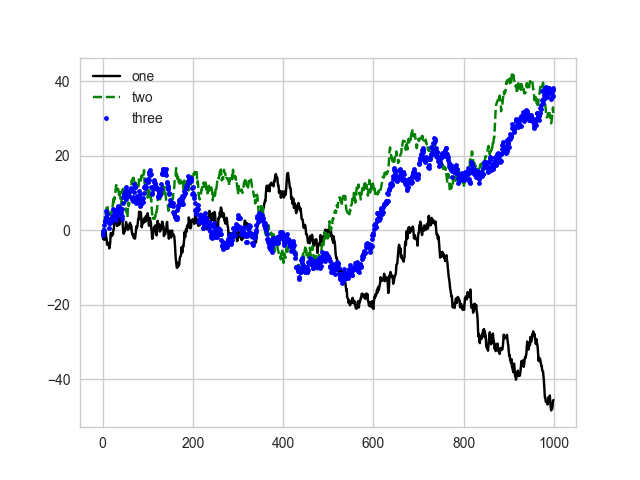

In [78]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'g--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'b.', label='three')

ax.legend(loc='best')

### 9.1.5 Annotations and Drawing on a Subplot
<a id='915'></a>
You can add annotations and text using the 
* **text**
* **arrow**
* and **annotate** functions.

Text draws text at given coordinates (x, y) on the plot with optional custom styling

<IPython.core.display.Javascript object>


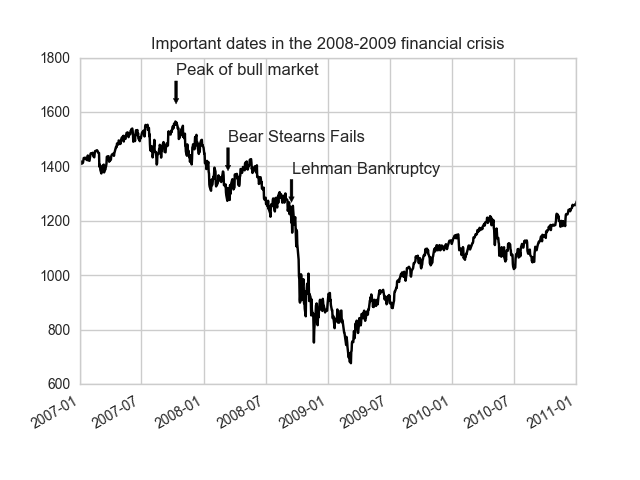

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

In [79]:
import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data= [
    (datetime.datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime.datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime.datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

# The ax.annotate method can draw labels at the indicated x and y coordinates. 
# We use the set_xlim and set_ylim methods to manually set the start and end 
# boundaries for the plot rather than using matplotlib’s default. 
# Lastly, ax.set_title adds a main title to the plot

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date)+ 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', 
                verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

Drawing shapes requires some more care. matplotlib has objects that represent many common shapes, referred to as patches. Some of these, like *Rectangle* and *Circle*, are found in *matplotlib.pyplot*, but the full set is located in *matplotlib.patches*.
To add a shape to a plot, you create the patch object shp and add it to a subplot by calling ***ax.add_patch(shp)***

<IPython.core.display.Javascript object>


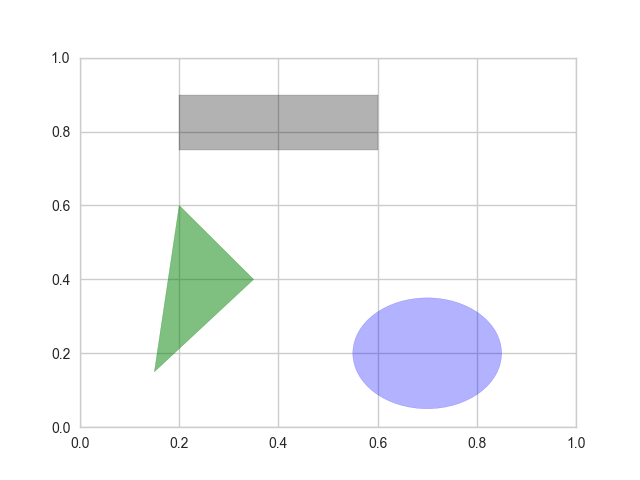

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.6 Saving Plots to File
<a id='916'></a>
You can save the active figure to file using ***plt.savefig***.

    plt.savefig('figpath.svg')
    plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [81]:
from io import BytesIO

buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### 9.1.7 matplotlib Configuration
<a id='917'></a>
One way to modify the configuration programmatically from Python is to use the ***rc*** method; for example, to set the global default figure size to be 10 × 10, you could enter:

    plt.rc('figure', figsize=(10, 10))
    
or

    font_options = {'family' : 'monospace',
                    'weight' : 'bold',
                    'size'   : 'small'}
    plt.rc('font', **font_options)

## 9.2 Plotting with pandas and seaborn
<a id='92'></a>
In pandas we may have multiple columns of data, along with row and column labels. pandas itself has built-in methods that simplify creating visualizations from DataFrame and Series objects. Another library is ***seaborn***, a statistical graphics library created by Michael Waskom. Seaborn simplifies creating many common visualization types.

> #### TIP
> Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics. Even if you do not use the seaborn API, you may prefer to import seaborn as a simple way to improve the visual aesthetics of general matplotlib plots.

### 9.2.1 Line Plots
<a id='921'></a>

<IPython.core.display.Javascript object>


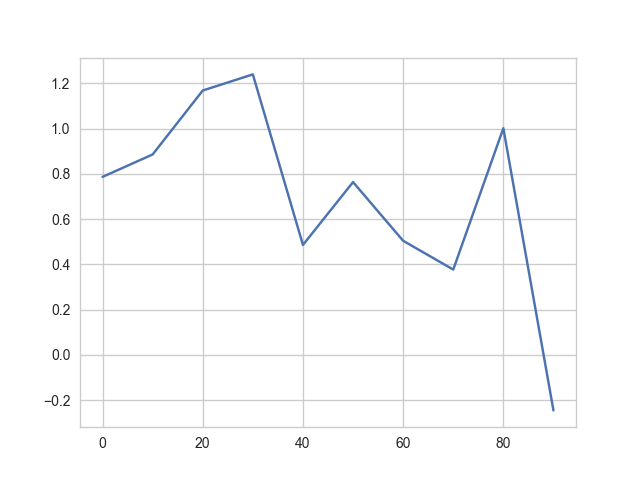

In [82]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

s.plot()

<IPython.core.display.Javascript object>


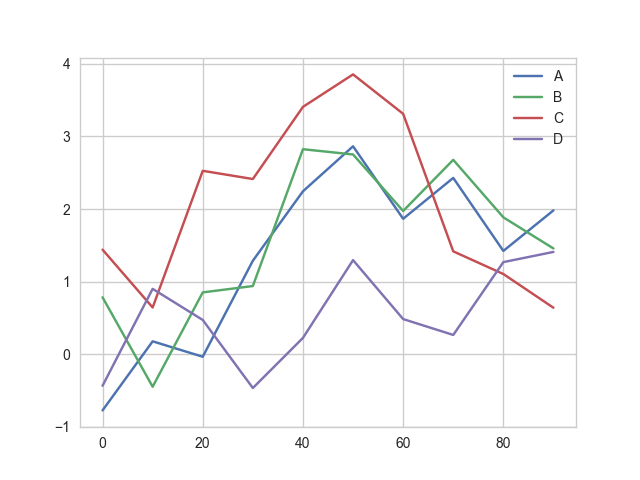

In [83]:
# Most of pandas’s plotting methods accept an optional ax parameter, which can be a matplotlib subplot object. 
# This gives you more flexible placement of subplots in a grid layout.
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

df.plot()

### 9.2.2 Bar Plots
<a id='922'></a>
* plot.bar()
* plot.barh()

<IPython.core.display.Javascript object>


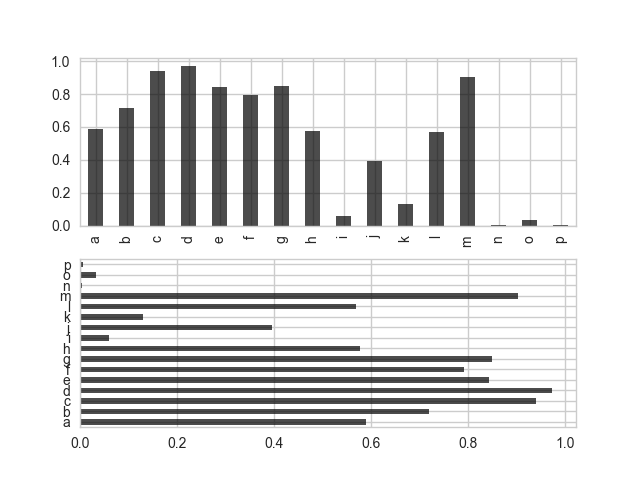

In [84]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [85]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df

Genus,A,B,C,D
one,0.733399,0.476805,0.324371,0.075854
two,0.499162,0.448056,0.343511,0.315448
three,0.573094,0.386518,0.332675,0.605914
four,0.713987,0.549954,0.670958,0.985076
five,0.197417,0.034216,0.589680,0.744514
six,0.978330,0.868873,0.903762,0.569910


<IPython.core.display.Javascript object>


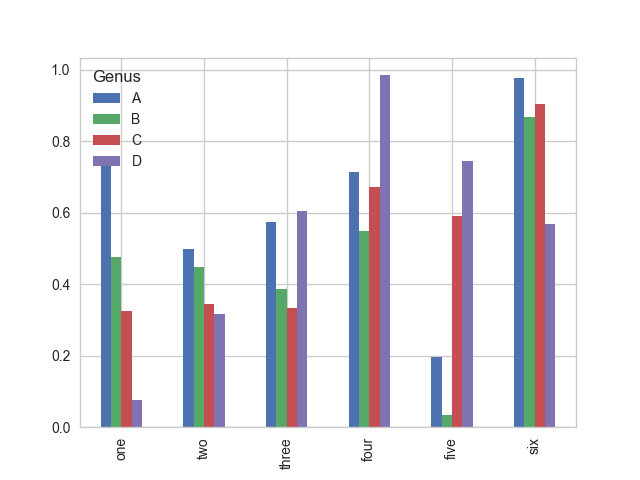

In [86]:
df.plot.bar()

<IPython.core.display.Javascript object>


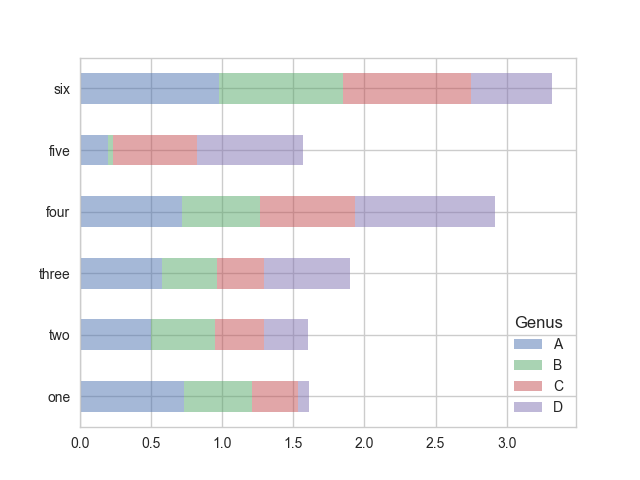

In [87]:
df.plot.barh(stacked=True, alpha=0.5)

In [88]:
tips = pd.read_csv('examples/tips.csv')

# Compute a simple cross-tabulation of two (or more) factors. By default
# computes a frequency table of the factors unless an array of values and an
# aggregation function are passed
party_counts = pd.crosstab(tips['day'], tips['size'])

party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [89]:
party_counts = party_counts.loc[:, 2:5]

# Floating division of dataframe and other, element-wise (binary operator `truediv`).
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


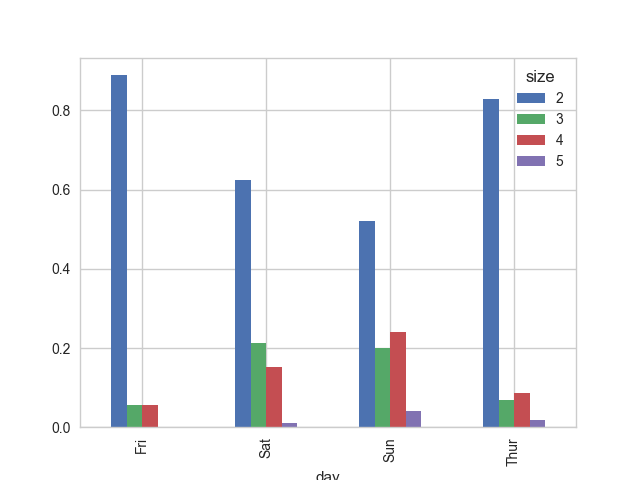

In [90]:
party_pcts.plot.bar()

In [91]:
# With data that requires aggregation or summarization before making a plot, 
# using the seaborn package can make things much simpler. 
# Let’s look now at the tipping percentage by day with seaborn

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


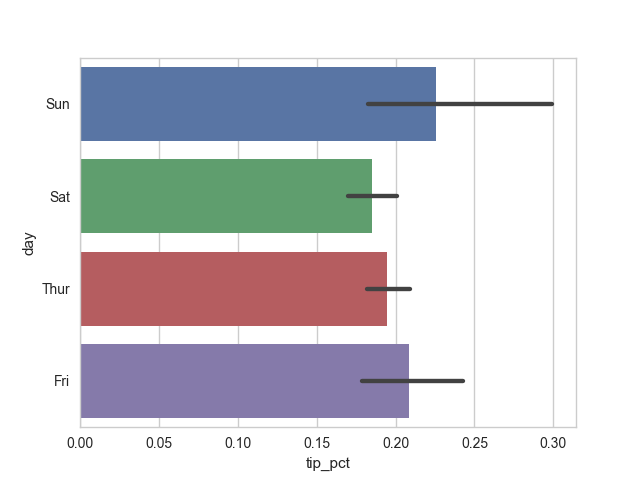

In [92]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

seaborn.barplot(x='tip_pct', y='day', data=tips, orient='h')

<IPython.core.display.Javascript object>


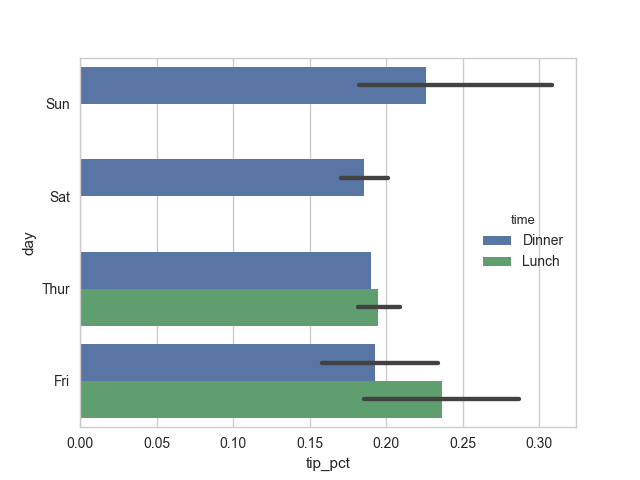

In [93]:
# The black lines drawn on the bars represent the 95% confidence interval 
# (this can be con‐ figured through optional arguments).

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# seaborn.barplot has a hue option that enables us to split by an additional categorical value
seaborn.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

# Notice that seaborn has automatically changed the aesthetics of plots: the default color palette, 
# plot background, and grid line colors. You can switch between different plot appearances using seaborn.set:
seaborn.set(style="whitegrid")

### 9.2.3 Histograms and Density Plots
<a id='923'></a>
Using the tipping data from before, we can make a histo‐ gram of tip percentages of the total bill using the plot.hist method on the Series

<IPython.core.display.Javascript object>


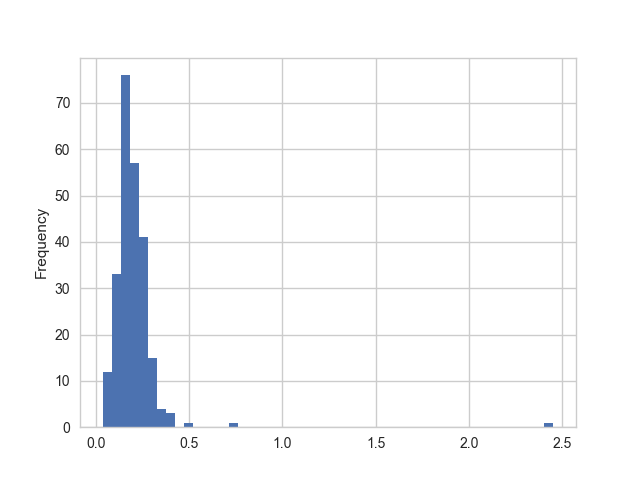

In [94]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


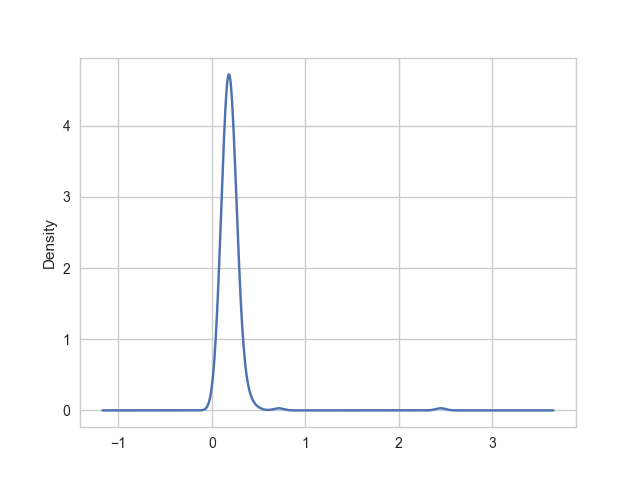

In [95]:
# A related plot type is a density plot, which is formed by computing an estimate of a continuous 
# probability distribution that might have generated the observed data. The usual procedure is to 
# approximate this distribution as a mixture of “kernels”—that is, simpler distributions like the 
# normal distribution. Thus, density plots are also known as kernel density estimate (KDE) plots. 
# Using plot.kde makes a density plot using the conventional mixture-of-normals estimate 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier through its ***distplot*** method, which can plot both a histogram and a continuous density estimate simulta‐ neously. As an example, consider a bimodal distribution consisting of draws from two different standard normal distributions

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


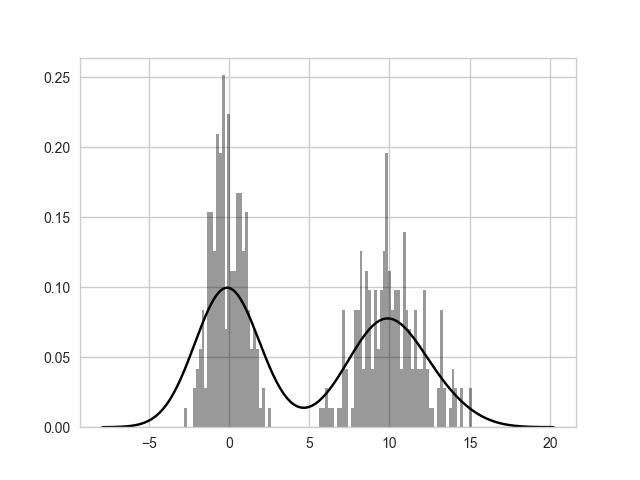

In [96]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

seaborn.distplot(values, bins=100, color='k')

### 9.2.4 Scatter or Point Plots
<a id='924'></a>

In [97]:
macro = pd.read_csv('examples/macrodata.csv')

data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


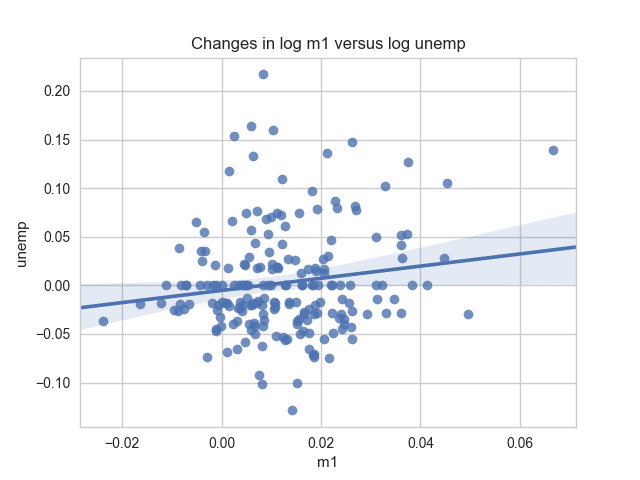

Text(0.5,1,'Changes in log m1 versus log unemp')

In [98]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# We can then use seaborn’s regplot method, which makes a scatter plot and fits a lin‐ ear regression line
seaborn.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


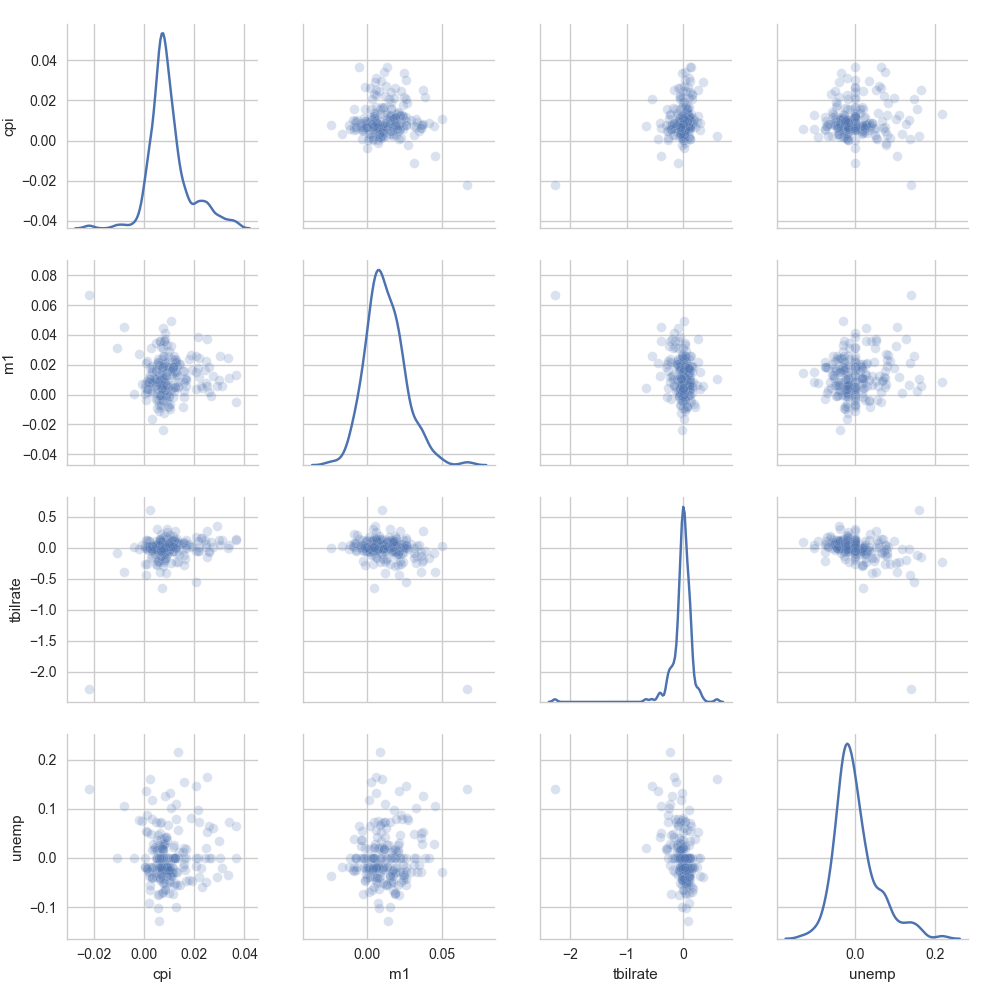

In [99]:
# seaborn has a convenient pairplot function, which supports placing histograms 
# or density estimates of each variable along the diagonal
seaborn.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### 9.2.5 Facet Grids and Categorical Data
<a id='925'></a>

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


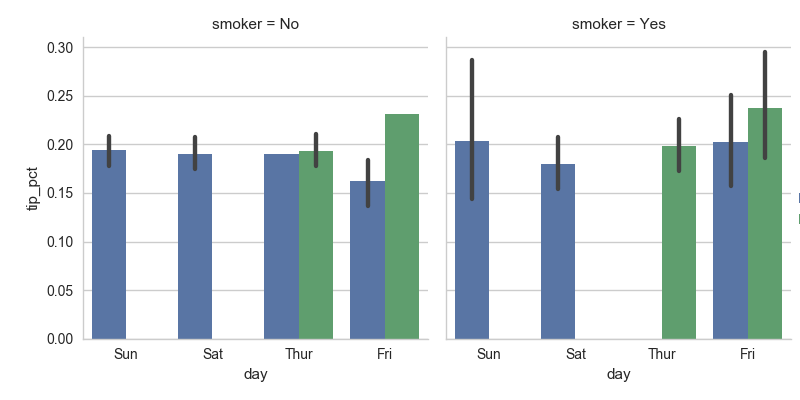

In [100]:
# One way to vis‐ ualize data with many categorical variables is to use a facet grid.
seaborn.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


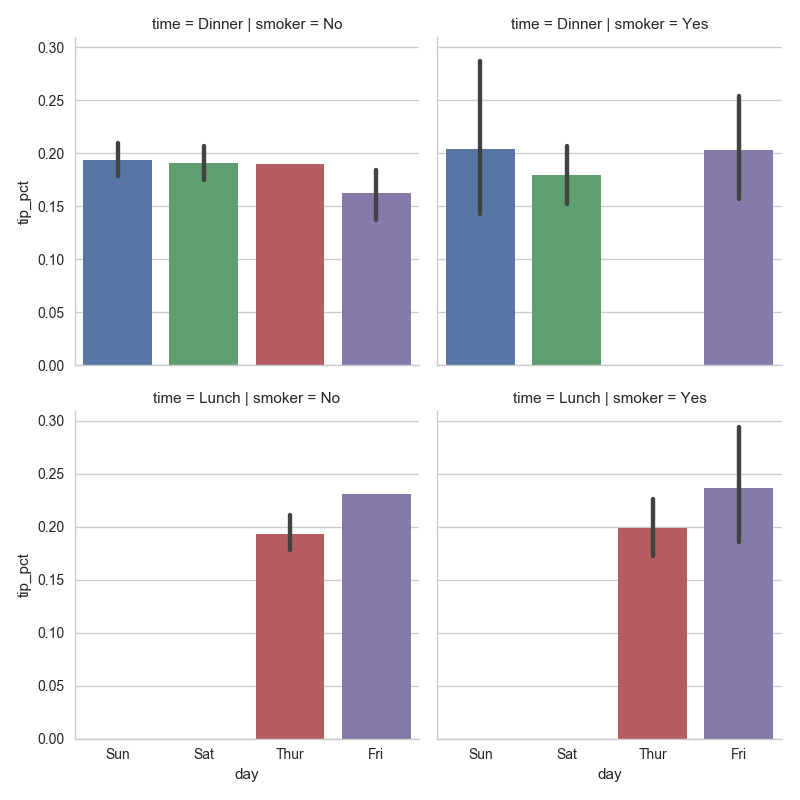

In [101]:
# Instead of grouping by 'time' by different bar colors within a facet, 
# we can also expand the facet grid by adding one row per time value 
seaborn.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


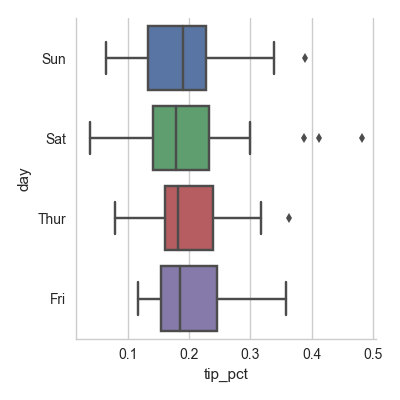

In [102]:
# factorplot supports other plot types that may be useful depending on what you are trying to display. 
# For example, box plots (which show the median, quartiles, and outliers) can be an effective visualization type 
seaborn.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

## 9.3 Other Python Visualization Tools
<a id='93'></a>
* Bokeh http://bokeh.pydata.org/
* Plotly https://github.com/plotly/plotly.py

<hr>

[Back to top](#index)